In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import word_tokenize

from sklearn.preprocessing import LabelEncoder

import re

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
df=pd.read_csv("/content/blogs.csv",encoding='latin')
df

Data              Labels
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....         alt.atheism
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...         alt.atheism
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...         alt.atheism
...                                                 ...                 ...
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  talk.religion.misc
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...  talk.religion.misc
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...  talk.religion.misc

[2000 rows x 2 columns]

## **Data Exploration and Preprocessing**

In [4]:
df.drop(df.filter(regex='Unnamed'),axis=1,inplace=True)
df

Data              Labels
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....         alt.atheism
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...         alt.atheism
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...         alt.atheism
...                                                 ...                 ...
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  talk.religion.misc
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...  talk.religion.misc
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...  talk.religion.misc

[2000 rows x 2 columns]

In [5]:
df['Labels'].value_counts()

Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64

In [68]:
# converting the categorical columns to numerical
le=LabelEncoder()
df['Labels']=le.fit_transform(df["Labels"])
df

Data  Labels  Length  \
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...       0    5972   
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....       0    1336   
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...       0    3116   
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...       0   15910   
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...       0    3264   
...                                                 ...     ...     ...   
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...      19    5263   
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....      19    1771   
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...      19    2192   
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....      19    3197   
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...      19    4676   

     Sentiment  
0     positive  
1     negative  
2     positive  
3     positive  
4     positive  
...        ...  
1995  positive  
1996  positive  
1997  positive  
1998  positive  
1999  positive  

[2000 rows x 4 columns]

In [9]:
df["Length"]=df['Data'].apply(len)
df

Data  Labels  Length
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...       0    5972
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....       0    1336
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...       0    3116
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...       0   15910
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...       0    3264
...                                                 ...     ...     ...
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...      19    5263
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....      19    1771
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...      19    2192
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....      19    3197
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...      19    4676

[2000 rows x 3 columns]

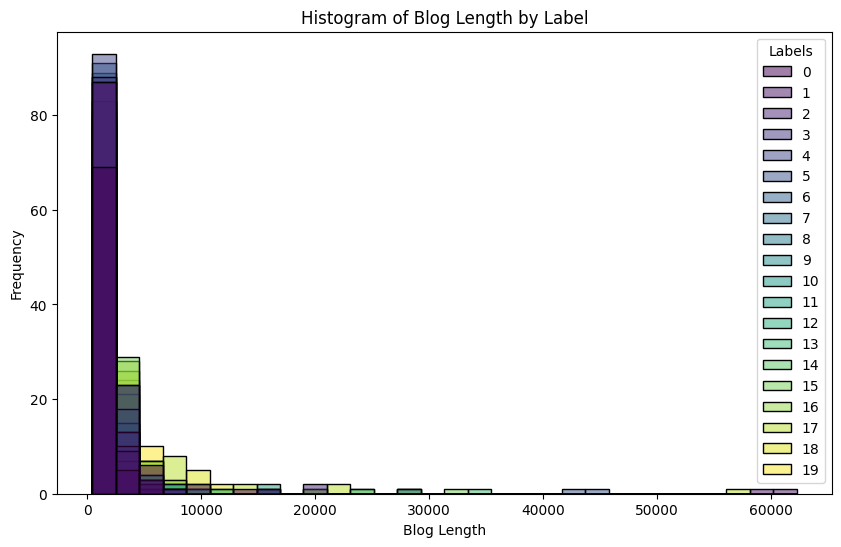

In [75]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Length', hue='Labels', bins=30,palette='viridis')
plt.title('Histogram of Blog Length by Label')
plt.xlabel('Blog Length')
plt.ylabel('Frequency')
plt.show()

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
        <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>],
       [<Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
        <Axes: title={'center': '14'}>, <Axes: title={'center': '15'}>],
       [<Axes: title={'center': '16'}>, <Axes: title={'center': '17'}>,
        <Axes: title={'center': '18'}>, <Axes: title={'center': '19'}>]],
      dtype=object)

<Figure size 2000x2000 with 0 Axes>

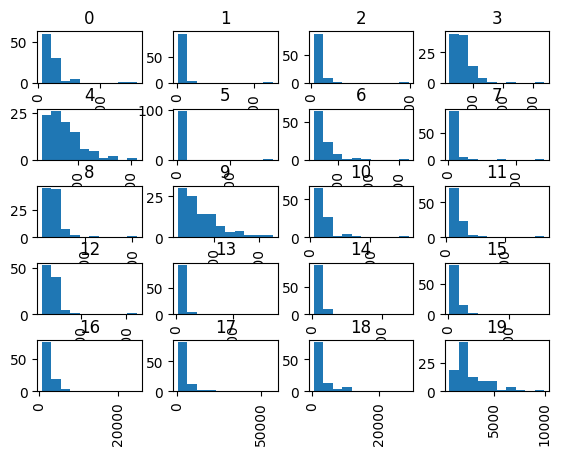

In [73]:
plt.figure(figsize=(20,20))
df.hist(column='Length',by="Labels")



In [19]:
def wordcld(data):
  txt=' '.join(data['Data'])
  txt=txt.lower()
  stop=STOPWORDS

  wc=WordCloud(background_color='white').generate(txt)
  plt.imshow(wc)
  plt.axis("off")
  plt.show()

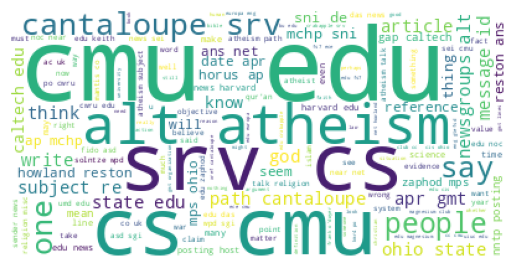

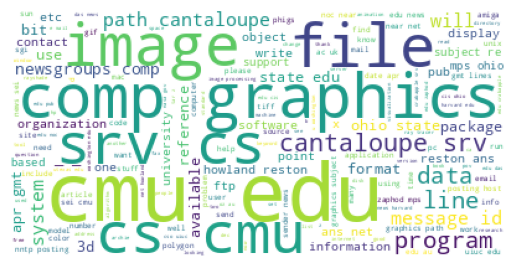

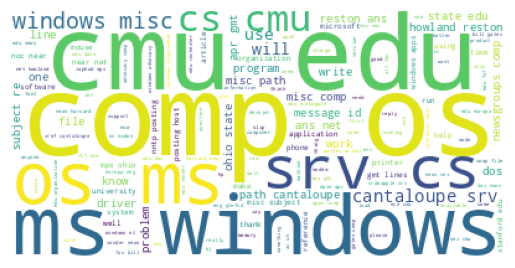

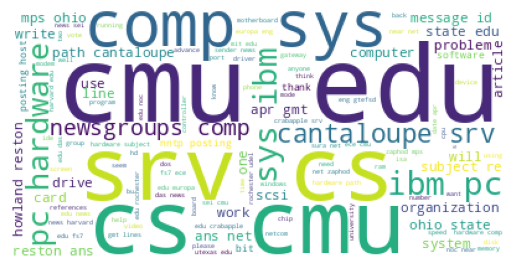

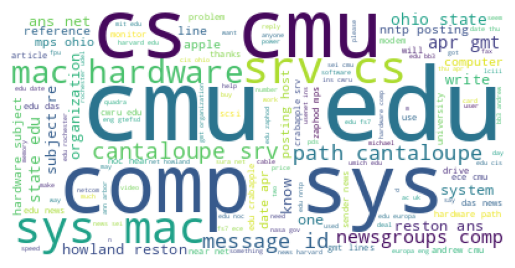

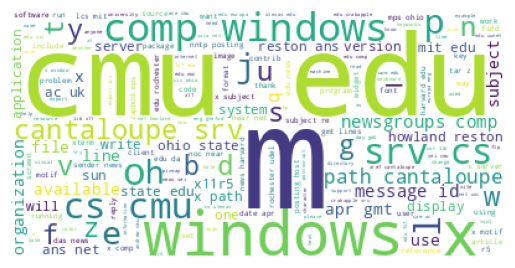

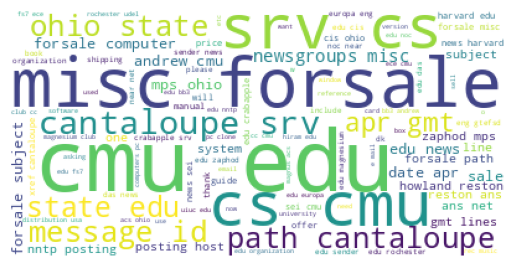

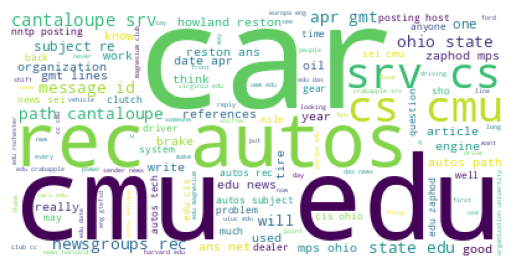

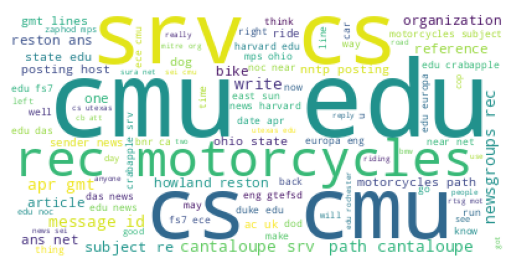

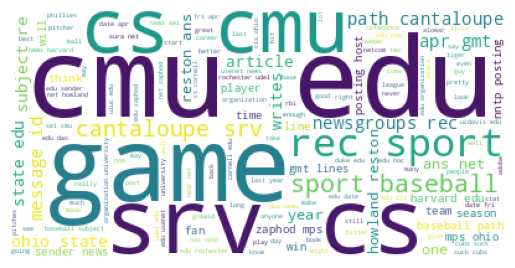

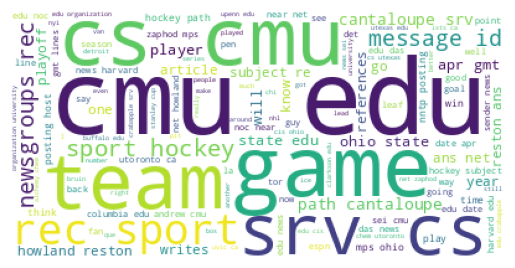

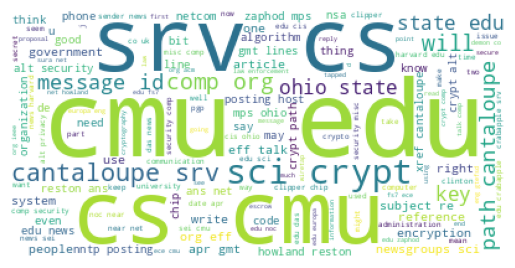

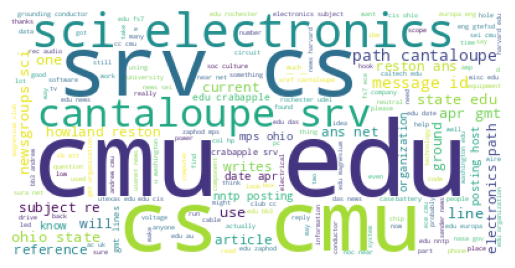

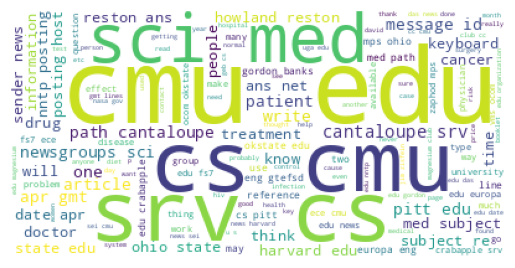

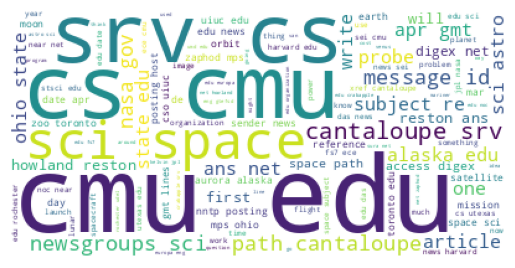

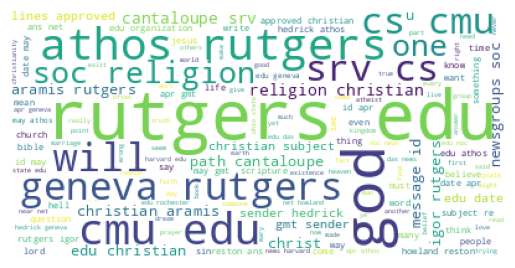

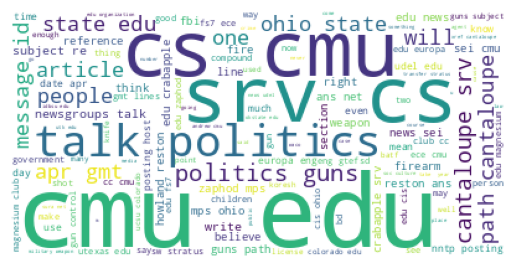

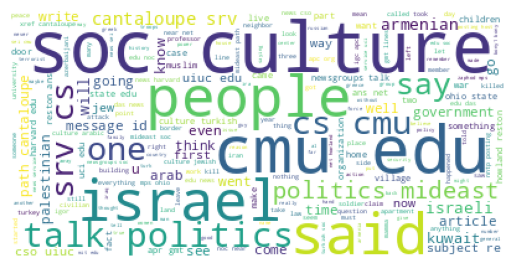

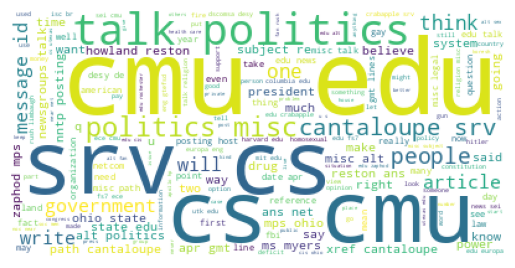

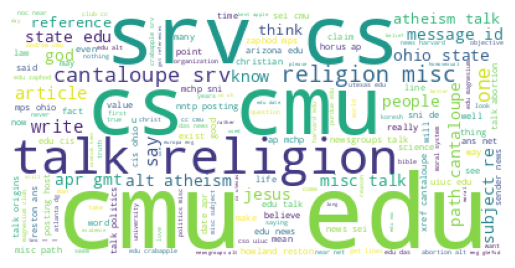

In [21]:
for label in df["Labels"].unique():
  # Filter the DataFrame for the current label
  filtered_df = df[df["Labels"] == label]
  wordcld(filtered_df)

In [29]:
lemma=WordNetLemmatizer()

In [30]:
corpus=[]
for i in range(len(df)):
  msg=re.sub('[^a-zA-z]',' ',df['Data'][i])
  msg=msg.lower()
  msg = word_tokenize(msg)

  msg=[lemma.lemmatize(i) for i in msg if not i in stopwords.words('english')]
  msg=' '.join(msg)
  corpus.append(msg)

In [31]:
corpus

['path cantaloupe srv c cmu edu magnesium club cc cmu edu news sei cmu edu ci ohio state edu zaphod mp ohio state edu howland reston an net agate doc ic ac uk uknet mcsun germany eu net thoth mchp sni de horus ap mchp sni de frank frank uucp frank dwyer newsgroups alt atheism subject islamic genocide date apr gmt organization siemens nixdorf ag line distribution world message id r vej k horus ap mchp sni de reference r qe fido asd sgi com r ubl bd horus ap mchp sni de r ek uo fido asd sgi com nntp posting host ap mchp sni de article r ek uo fido asd sgi com livesey solntze wpd sgi com jon livesey writes article r ubl bd horus ap mchp sni de frank uucp frank dwyer writes article r qe fido asd sgi com livesey solntze wpd sgi com jon livesey writes noting particular society case mainland uk religously motivated murder murder kind say little whether inter religion murder elsewhere religiously motivated allows one conclude nothing inherent religion matter catholicism protestantism motivates

In [32]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


In [34]:
tf=TfidfVectorizer()
x=tf.fit_transform(corpus)
x=pd.DataFrame(x.toarray(),columns=tf.get_feature_names_out())
x

__  ___  ____  _____  ______  _______  ________  _________  __________  \
0     0.0  0.0   0.0    0.0     0.0      0.0       0.0        0.0         0.0   
1     0.0  0.0   0.0    0.0     0.0      0.0       0.0        0.0         0.0   
2     0.0  0.0   0.0    0.0     0.0      0.0       0.0        0.0         0.0   
3     0.0  0.0   0.0    0.0     0.0      0.0       0.0        0.0         0.0   
4     0.0  0.0   0.0    0.0     0.0      0.0       0.0        0.0         0.0   
...   ...  ...   ...    ...     ...      ...       ...        ...         ...   
1995  0.0  0.0   0.0    0.0     0.0      0.0       0.0        0.0         0.0   
1996  0.0  0.0   0.0    0.0     0.0      0.0       0.0        0.0         0.0   
1997  0.0  0.0   0.0    0.0     0.0      0.0       0.0        0.0         0.0   
1998  0.0  0.0   0.0    0.0     0.0      0.0       0.0        0.0         0.0   
1999  0.0  0.0   0.0    0.0     0.0      0.0       0.0        0.0         0.0   

      ____________  ...  zxmkr   zy  zyda  zyeh  zyq  zyxel   zz  zzd  zzs  \
0              0.0  ...    0.0  0.0   0.0   0.0  0.0    0.0  0.0  0.0  0.0   
1              0.0  ...    0.0  0.0   0.0   0.0  0.0    0.0  0.0  0.0  0.0   
2              0.0  ...    0.0  0.0   0.0   0.0  0.0    0.0  0.0  0.0  0.0   
3              0.0  ...    0.0  0.0   0.0   0.0  0.0    0.0  0.0  0.0  0.0   
4              0.0  ...    0.0  0.0   0.0   0.0  0.0    0.0  0.0  0.0  0.0   
...            ...  ...    ...  ...   ...   ...  ...    ...  ...  ...  ...   
1995           0.0  ...    0.0  0.0   0.0   0.0  0.0    0.0  0.0  0.0  0.0   
1996           0.0  ...    0.0  0.0   0.0   0.0  0.0    0.0  0.0  0.0  0.0   
1997           0.0  ...    0.0  0.0   0.0   0.0  0.0    0.0  0.0  0.0  0.0   
1998           0.0  ...    0.0  0.0   0.0   0.0  0.0    0.0  0.0  0.0  0.0   
1999           0.0  ...    0.0  0.0   0.0   0.0  0.0    0.0  0.0  0.0  0.0   

      zzx  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
...   ...  
1995  0.0  
1996  0.0  
1997  0.0  
1998  0.0  
1999  0.0  

[2000 rows x 35139 columns]

In [35]:
x.columns


Index(['__', '___', '____', '_____', '______', '_______', '________',
       '_________', '__________', '____________',
       ...
       'zxmkr', 'zy', 'zyda', 'zyeh', 'zyq', 'zyxel', 'zz', 'zzd', 'zzs',
       'zzx'],
      dtype='object', length=35139)

In [36]:
cv=CountVectorizer()
x=cv.fit_transform(corpus)
x=pd.DataFrame(x.toarray(),columns=cv.get_feature_names_out())
x

__  ___  ____  _____  ______  _______  ________  _________  __________  \
0      0    0     0      0       0        0         0          0           0   
1      0    0     0      0       0        0         0          0           0   
2      0    0     0      0       0        0         0          0           0   
3      0    0     0      0       0        0         0          0           0   
4      0    0     0      0       0        0         0          0           0   
...   ..  ...   ...    ...     ...      ...       ...        ...         ...   
1995   0    0     0      0       0        0         0          0           0   
1996   0    0     0      0       0        0         0          0           0   
1997   0    0     0      0       0        0         0          0           0   
1998   0    0     0      0       0        0         0          0           0   
1999   0    0     0      0       0        0         0          0           0   

      ____________  ...  zxmkr  zy  zyda  zyeh  zyq  zyxel  zz  zzd  zzs  zzx  
0                0  ...      0   0     0     0    0      0   0    0    0    0  
1                0  ...      0   0     0     0    0      0   0    0    0    0  
2                0  ...      0   0     0     0    0      0   0    0    0    0  
3                0  ...      0   0     0     0    0      0   0    0    0    0  
4                0  ...      0   0     0     0    0      0   0    0    0    0  
...            ...  ...    ...  ..   ...   ...  ...    ...  ..  ...  ...  ...  
1995             0  ...      0   0     0     0    0      0   0    0    0    0  
1996             0  ...      0   0     0     0    0      0   0    0    0    0  
1997             0  ...      0   0     0     0    0      0   0    0    0    0  
1998             0  ...      0   0     0     0    0      0   0    0    0    0  
1999             0  ...      0   0     0     0    0      0   0    0    0    0  

[2000 rows x 35139 columns]

In [39]:
y=df["Labels"]
y

0        0
1        0
2        0
3        0
4        0
        ..
1995    19
1996    19
1997    19
1998    19
1999    19
Name: Labels, Length: 2000, dtype: int64

## **Naive Bayes Model for Text Classification**

In [53]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [43]:
x_train

__  ___  ____  _____  ______  _______  ________  _________  __________  \
836    0    0     0      0       0        0         0          0           0   
575    0    0     0      0       0        0         0          0           0   
557    0    0     0      0       0        0         0          0           0   
1235   0    0     0      0       0        0         0          0           0   
1360   0    0     0      0       0        0         0          0           0   
...   ..  ...   ...    ...     ...      ...       ...        ...         ...   
1130   0    0     0      0       0        0         0          0           0   
1294   0    0     0      0       0        0         0          0           0   
860    0    0     0      0       0        0         0          0           0   
1459   0    0     0      0       0        0         0          0           0   
1126   0    0     0      0       0        0         0          0           0   

      ____________  ...  zxmkr  zy  zyda  zyeh  zyq  zyxel  zz  zzd  zzs  zzx  
836              0  ...      0   0     0     0    0      0   0    0    0    0  
575              0  ...      0   0     0     0    0      0   0    0    0    0  
557              0  ...      0   0     0     0    0      0   0    0    0    0  
1235             0  ...      0   0     0     0    0      0   0    0    0    0  
1360             0  ...      0   0     0     0    0      0   0    0    0    0  
...            ...  ...    ...  ..   ...   ...  ...    ...  ..  ...  ...  ...  
1130             0  ...      0   0     0     0    0      0   0    0    0    0  
1294             0  ...      0   0     0     0    0      0   0    0    0    0  
860              0  ...      0   0     0     0    0      0   0    0    0    0  
1459             0  ...      0   0     0     0    0      0   0    0    0    0  
1126             0  ...      0   0     0     0    0      0   0    0    0    0  

[1400 rows x 35139 columns]

In [44]:
x_test

__  ___  ____  _____  ______  _______  ________  _________  __________  \
1860   0    0     0      0       0        0         0          0           0   
353    0    0     0      0       0        0         0          0           0   
1333   0    0     0      0       0        0         0          0           0   
905    0    0     0      0       0        0         0          0           0   
1289   0    0     0      0       0        0         0          0           0   
...   ..  ...   ...    ...     ...      ...       ...        ...         ...   
148    0    0     0      0       0        0         0          0           0   
1554   0    0     0      0       0        0         0          0           0   
1956   0    0     0      0       0        0         0          0           0   
925    0    0     0      0       0        0         0          0           0   
942    0    0     0      0       0        0         0          0           0   

      ____________  ...  zxmkr  zy  zyda  zyeh  zyq  zyxel  zz  zzd  zzs  zzx  
1860             0  ...      0   0     0     0    0      0   0    0    0    0  
353              0  ...      0   0     0     0    0      0   0    0    0    0  
1333             0  ...      0   0     0     0    0      0   0    0    0    0  
905              0  ...      0   0     0     0    0      0   0    0    0    0  
1289             0  ...      0   0     0     0    0      0   0    0    0    0  
...            ...  ...    ...  ..   ...   ...  ...    ...  ..  ...  ...  ...  
148              0  ...      0   0     0     0    0      0   0    0    0    0  
1554             0  ...      0   0     0     0    0      0   0    0    0    0  
1956             0  ...      0   0     0     0    0      0   0    0    0    0  
925              0  ...      0   0     0     0    0      0   0    0    0    0  
942              0  ...      0   0     0     0    0      0   0    0    0    0  

[600 rows x 35139 columns]

In [45]:
y_train

836      8
575      5
557      5
1235    12
1360    13
        ..
1130    11
1294    12
860      8
1459    14
1126    11
Name: Labels, Length: 1400, dtype: int64

In [46]:
y_test

1860    18
353      3
1333    13
905      9
1289    12
        ..
148      1
1554    15
1956    19
925      9
942      9
Name: Labels, Length: 600, dtype: int64

In [48]:
Nb=MultinomialNB()
Nb.fit(x_train,y_train)

MultinomialNB()

In [55]:
y_pred=Nb.predict(x_test)
y_pred

array([18,  3, 13,  9,  3, 12,  9, 17,  0, 13,  0, 13, 11,  2,  3,  2,  7,
        1, 16, 18,  6, 18,  0, 10,  0, 11, 11,  9,  7,  0,  6, 10,  5,  9,
       10,  4, 13, 10, 10,  2,  1, 19,  2,  1, 15,  8, 11,  8,  0, 18, 15,
        1, 14,  2,  9, 17, 12, 16, 11,  1, 14,  6, 16, 10, 18, 18,  9, 15,
        1, 14, 14,  3, 13, 10,  6, 12, 18,  7, 12, 18,  0,  8, 14, 15, 18,
       10, 17,  4,  2, 16, 15, 17,  2,  1, 18, 18,  6, 12, 15, 18,  9,  9,
        4, 13,  1,  8,  7,  2,  6, 11,  7, 14, 10, 17,  7,  1, 11,  9,  3,
       11, 18, 10, 11,  0, 11, 15,  4,  8, 11,  3, 19, 18,  7,  5,  8,  7,
        0,  0, 16, 15, 13,  3, 18,  8, 15,  5,  6,  4,  2,  1, 16,  9,  6,
       11,  3,  1,  1, 16,  3, 16,  6,  8,  1, 11, 19, 14, 17,  1,  2, 17,
       11, 12,  0, 18,  4, 13, 12, 16,  8, 16, 12,  7, 18, 11,  8,  7,  0,
       16, 11, 12,  7,  2, 13,  2, 19, 12, 11,  8,  6, 15, 10,  5,  1,  7,
       11,  2, 14,  7, 10,  0, 17,  0,  2,  1,  7, 18, 11,  3,  1, 12,  9,
        1,  5, 11, 18, 19

In [56]:
print(f"training accuracy:{Nb.score(x_train,y_train)}")
print(f"testing accuracy:{Nb.score(x_test,y_test)}")

training accuracy:0.9892857142857143
testing accuracy:0.7583333333333333


In [59]:
print(f"Accuracy:{accuracy_score(y_test,y_pred)}")
print(f"Precision:{precision_score(y_test,y_pred,average='weighted')}")
print(f"Recall:{recall_score(y_test,y_pred,average='weighted')}")
print(f"f1:{f1_score(y_test,y_pred,average='weighted')}")
print(f"classification_rep:{classification_report(y_test,y_pred)}")

Accuracy:0.7583333333333333
Precision:0.8007092657384688
Recall:0.7583333333333333
f1:0.7570525223096041
classification_rep:              precision    recall  f1-score   support

           0       0.54      0.83      0.66        24
           1       0.41      0.86      0.56        28
           2       0.87      0.79      0.83        33
           3       0.70      0.72      0.71        36
           4       0.95      0.53      0.68        36
           5       0.94      0.42      0.58        36
           6       0.79      0.79      0.79        24
           7       0.79      0.87      0.83        31
           8       0.84      0.95      0.89        22
           9       1.00      0.81      0.90        32
          10       0.75      0.96      0.84        25
          11       0.69      1.00      0.81        24
          12       0.68      0.56      0.61        27
          13       0.91      0.70      0.79        30
          14       0.94      0.91      0.92        32
          1

## **Sentiment Analysis**

In [60]:
!pip install textblob nltk

In [61]:
from textblob import TextBlob
def get_sentiment(text):
  polarity=TextBlob(text).sentiment.polarity
  if polarity>0:
    return "positive"
  elif polarity<0:
    return "negative"
  else:
    return "neutral"

In [63]:
df['Sentiment'] = df['Data'].apply(get_sentiment)

In [64]:
df

Data  Labels  Length  \
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...       0    5972   
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....       0    1336   
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...       0    3116   
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...       0   15910   
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...       0    3264   
...                                                 ...     ...     ...   
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...      19    5263   
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....      19    1771   
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...      19    2192   
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....      19    3197   
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...      19    4676   

     Sentiment  
0     positive  
1     negative  
2     positive  
3     positive  
4     positive  
...        ...  
1995  positive  
1996  positive  
1997  positive  
1998  positive  
1999  positive  

[2000 rows x 4 columns]

In [66]:
sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack()
print(sentiment_distribution)

Sentiment  negative  positive
Labels                       
0                23        77
1                24        76
2                22        78
3                20        80
4                24        76
5                27        73
6                16        84
7                17        83
8                26        74
9                29        71
10               34        66
11               19        81
12               19        81
13               29        71
14               27        73
15               13        87
16               30        70
17               22        78
18               22        78
19               14        86


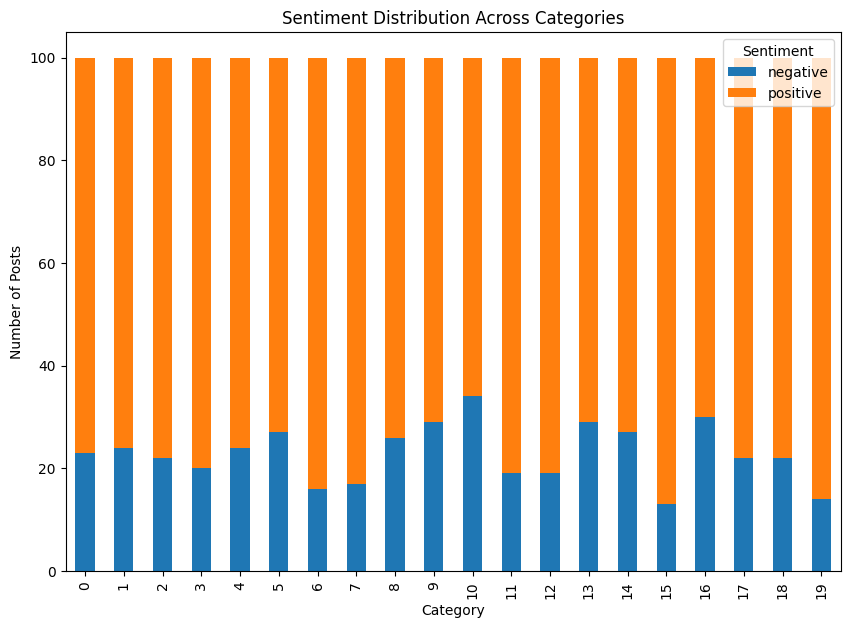

In [67]:
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10,7))
plt.title("Sentiment Distribution Across Categories")
plt.xlabel("Category")
plt.ylabel("Number of Posts")
plt.show()